In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [61]:
df = pd.read_csv('../../data/fanfic_regression_data_merged_chs_no_zero.tsv', sep = '\t')


In [62]:
df.head()

,Bookmarks,Chapters,Hits,Kudos,Words,Comments,URL_x,Term_novelty,Entropy,URL_y,...,Fandom_tolkien,Fandom_shakespare,Fandom_hetalia,Fandom_attack_on_titan,Fandom_ms_paint_adventures,Fandom_marvel,Fandom_sailor_moon,Fandom_one_direction,Fandom_sherlock,History
0,21,24,2399.0,53.0,66258.0,16,http://archiveofourown.org/works/488677/chapte...,0.526087,5.279514,http://archiveofourown.org/works/488677/chapte...,...,0,0,0,0,0,0,0,0,0,3840.0
1,7,1,2333.0,80.0,3542.0,3,http://archiveofourown.org/works/208853?view_a...,0.440696,5.582030,http://archiveofourown.org/works/208853?view_a...,...,0,0,0,0,0,0,0,0,0,3845.0
2,1,1,200.0,21.0,837.0,0,http://archiveofourown.org/works/1644146,0.505865,4.686514,http://archiveofourown.org/works/1644146,...,0,0,0,0,0,0,0,0,0,3847.0
3,14,2,1635.0,115.0,15774.0,4,http://archiveofourown.org/works/967862/chapte...,0.410158,5.693977,http://archiveofourown.org/works/967862/chapte...,...,0,0,0,0,0,0,0,0,0,3849.0
4,5,1,2560.0,103.0,781.0,3,http://archiveofourown.org/works/1649069?view_...,0.413664,5.171727,http://archiveofourown.org/works/1649069?view_...,...,0,0,0,0,0,0,0,0,0,3836.0


In [63]:
term_ave = np.average(df['Term_novelty'])
topic_ave = np.average(df['Topic_novelty'])
df['Term_novelty_cent'] = df['Term_novelty'] - term_ave
df['Topic_novelty_cent'] = df['Topic_novelty'] - topic_ave
df['Term_novelty_squared'] = np.square(df['Term_novelty_cent'])
df['Topic_novelty_squared'] = np.square(df['Topic_novelty_cent'])

In [64]:
# df.sort_values(by='Topic_novelty').head()

In [65]:
# df_low = df[(df['Topic_novelty'] > 0.3) & (df['Topic_novelty'] < 0.45)]

In [66]:
# df_high = df[(df['Topic_novelty'] > 0.67) & (df['Topic_novelty'] < 1)]

In [67]:
# len(df_low)

In [68]:
# len(df_high)

In [69]:
len(df)

99579

In [70]:
# df_low = df_low.replace([np.inf, -np.inf], np.nan)
# df_low = df_low.dropna(how = 'any')
# df_high= df_high.replace([np.inf, -np.inf], np.nan)
# df_high = df_high.dropna(how = 'any')


In [71]:
# len(df_high)

In [72]:
df.columns.values

array(['Bookmarks', 'Chapters', 'Hits', 'Kudos', 'Words', 'Comments',
       'URL_x', 'Term_novelty', 'Entropy', 'URL_y', 'Topic_novelty',
       'Freq_relationship', 'Category_F_F', 'Category_F_M',
       'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other',
       'Category_Unknown', 'ArchiveWarnings_underage',
       'ArchiveWarnings_death', 'ArchiveWarnings_choose_no',
       'ArchiveWarnings_no_apply', 'ArchiveWarnings_violence',
       'ArchiveWarnings_noncon', 'author_fic_cnt', 'Rating_E', 'Rating_G',
       'Rating_M', 'Rating_N', 'Rating_T', 'Fandom_harry_potter',
       'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
       'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
       'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
       'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
       'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
       'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
     

### OLS

In [73]:

def run_ols(df, field):
    df['Kudos'] = np.log(df['Kudos'])
    df['Hits'] = np.log(df['Hits'])
    df['Comments'] = np.log(df['Comments'])
    df['Bookmarks'] = np.log(df['Bookmarks'])
#     df = df.replace([np.inf, -np.inf], np.nan)
#     df = df.dropna(how = 'any')
    model = ols( field + " ~ + Term_novelty  + Topic_novelty + Term_novelty_squared\
                + Topic_novelty_squared + Entropy +\
                ArchiveWarnings_underage + ArchiveWarnings_death + \
                ArchiveWarnings_no_apply + ArchiveWarnings_violence + \
                ArchiveWarnings_noncon + Rating_E + Rating_G + Rating_M + \
                Rating_T + Category_F_F + Category_F_M + Category_Gen + Category_M_M + \
                Category_Multi + Category_Other + Freq_relationship + Chapters + \
        Fandom_harry_potter + Fandom_dcu + Fandom_doctor_who + \
       Fandom_star_wars + Fandom_arthurian + Fandom_supernatural +\
       Fandom_haikyuu + Fandom_kuroko_no_basuke + \
       Fandom_hamilton_miranda + Fandom_dragon_age +\
       Fandom_the_walking_dead + Fandom_buffy + Fandom_les_miserables +\
       Fandom_naruto + Fandom_tolkien + Fandom_shakespare + \
       Fandom_hetalia + Fandom_attack_on_titan +\
       Fandom_ms_paint_adventures + Fandom_marvel +\
       Fandom_sailor_moon + Fandom_sherlock", data = df).fit()
    return model

### Plot coefficients

In [74]:
kudos_model = run_ols(df, 'Kudos')
kudos_coef = np.asarray(list(kudos_model.params)[1:])
kudos_err = list(kudos_model.bse)[1:]

/anaconda3/envs/python36/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [75]:
hits_model = run_ols(df, 'Hits')
hits_coef = np.asarray(list(hits_model.params)[1:])
hits_err = list(hits_model.bse)[1:]

/anaconda3/envs/python36/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/anaconda3/envs/python36/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [76]:
comments_model = run_ols(df, 'Comments')
comments_coef = np.asarray(list(comments_model.params)[1:])
comments_err = list(comments_model.bse)[1:]

/anaconda3/envs/python36/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/data.py:480: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if hasattr(x, 'ix'):


In [77]:
bookmarks_model = run_ols(df, 'Bookmarks')
bookmarks_coef = np.asarray(list(bookmarks_model.params)[1:])
bookmarks_err = list(bookmarks_model.bse)[1:]

/anaconda3/envs/python36/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/data.py:480: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if hasattr(x, 'ix'):


In [78]:
~ + Term_novelty  + Topic_novelty + Entropy +\
                ArchiveWarnings_underage + ArchiveWarnings_death + \
                ArchiveWarnings_no_apply + ArchiveWarnings_violence + \
                ArchiveWarnings_noncon + Rating_E + Rating_G + Rating_M + \
                Rating_T + Category_F_F + Category_F_M + Category_Gen + Category_M_M + \
                Category_Multi + Category_Other + Freq_relationship + Chapters + \
        Fandom_harry_potter + Fandom_dcu + Fandom_doctor_who + \
       Fandom_star_wars + Fandom_arthurian + Fandom_supernatural +\
       Fandom_haikyuu + Fandom_kuroko_no_basuke + \
       Fandom_hamilton_miranda + Fandom_dragon_age +\
       Fandom_the_walking_dead + Fandom_buffy + Fandom_les_miserables +\
       Fandom_naruto + Fandom_tolkien + Fandom_shakespare + \
       Fandom_hetalia + Fandom_attack_on_titan +\
       Fandom_ms_paint_adventures + Fandom_marvel +\
       Fandom_sailor_moon + Fandom_sherlock + nonzero_prob"

SyntaxError: EOL while scanning string literal (<ipython-input-78-f70fba67b547>, line 1)

In [79]:
ylabels =['Term_novelty' , 'Topic_novelty', 'Term_novelty_sq', 'Topic_novelty_sq', 'Entropy', \
                'ArchiveWarnings(underage)', 'ArchiveWarnings(death)', \
                'ArchiveWarnings(no apply)', 'ArchiveWarnings(violence)', \
                'ArchiveWarnings(nonconsensual)' , 'Rating E' , 'Rating G' , 'Rating M' , \
                'Rating T' , 'Category F/F' , 'Category F/M' , 'Category Gen' , 'Category M/M' , \
                'Category Multi' , 'Category Other' , 'Frequent relationship' , \
                'Chapters' , \
        'Fandom harry potter' , 'Fandom dcu' , 'Fandom doctor who' , \
       'Fandom star wars' , 'Fandom arthurian' , 'Fandom supernatural' ,\
       'Fandom haikyuu' , 'Fandom kuroko no basuke' , \
       'Fandom hamilton miranda' , 'Fandom dragon age' ,\
       'Fandom the walking dead' , 'Fandom buffy' , 'Fandom les miserables' ,\
       'Fandom naruto' , 'Fandom tolkien' , 'Fandom shakespare' , \
       'Fandom hetalia' , 'Fandom attack on titan' ,\
       'Fandom ms paint adventures' , 'Fandom marvel' ,\
       'Fandom sailor moon' , 'Fandom sherlock'][::-1]

In [89]:
def plot_ax(ax, coef, err, top_tail_option, xlim_left, xlim_right, xlabel='', ylabel_flag=False):
    
    ax.errorbar(coef[::-1], range(len(coef)), xerr=err[::-1] , fmt='o', label=top_tail_option)
    ax.set_yticks(range(len(coef)))
    if ylabel_flag:
        ax.set_yticklabels(ylabels)
    else:
        ax.set_yticklabels([])

    ax.plot([0 for i in range(len(coef)+2)], range(-1,len(coef)+1), c='grey', alpha = 0.7)
    # ax[0].plot(range(-8,8), [21.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
    # ax[0].plot(range(-8,8), [25.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
    # ax[0].plot(range(-8,8), [30.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
    # ax[0].plot(range(-8,8), [36.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
    # ax[0].plot(range(-8,8), [39.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
    ax.set_ylim(-0.5,len(ylabels))
    ax.set_xlim(xlim_left,xlim_right)
    if xlabel != '':
        ax.set_xlabel(xlabel, fontsize=15)
    # ax[0].set_title('R-squared = 0.256', fontsize=15)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    ax.legend()

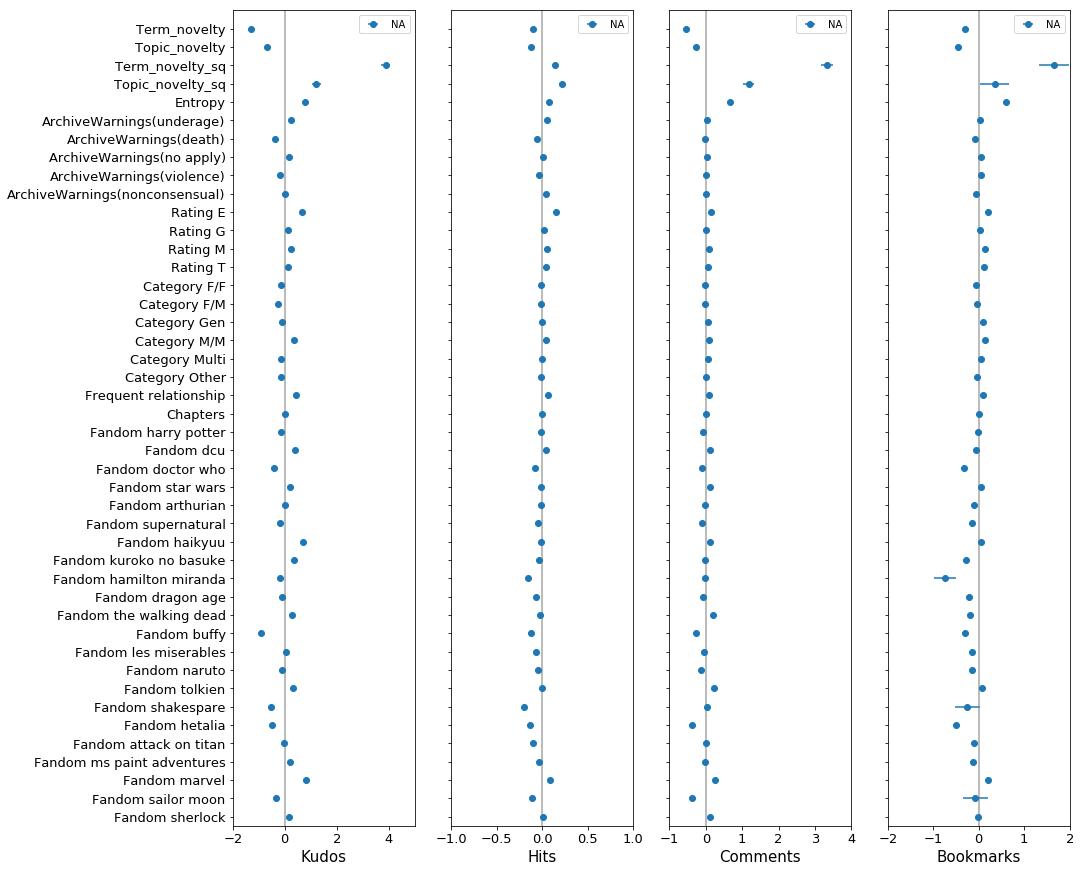

In [90]:
fig, ax = plt.subplots(1,4,figsize = (15,15))
plot_ax(ax=ax[0], coef=kudos_coef, err=kudos_err, xlim_left=-2, xlim_right=5, top_tail_option='NA', xlabel='Kudos', ylabel_flag=True)

plot_ax(ax=ax[1], coef=hits_coef, err=hits_err, xlabel='Hits', xlim_left=-1, xlim_right=1, top_tail_option='NA')

plot_ax(ax=ax[2], coef=comments_coef, err=comments_err, xlim_left=-1, xlim_right=4, xlabel='Comments', ylabel_flag=False, top_tail_option='NA')

plot_ax(ax=ax[3], coef=bookmarks_coef, err=bookmarks_err, xlim_left=-2, xlim_right=2, xlabel='Bookmarks', ylabel_flag=False, top_tail_option='NA')

# plt.savefig('ols_coefs_topic_novelty.pdf', format='pdf')

In [91]:
print(kudos_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Kudos   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     1084.
Date:                Mon, 20 Jan 2020   Prob (F-statistic):               0.00
Time:                        16:23:21   Log-Likelihood:            -1.5326e+05
No. Observations:               99579   AIC:                         3.066e+05
Df Residuals:                   99534   BIC:                         3.070e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [92]:
print(hits_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Hits   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     1135.
Date:                Mon, 20 Jan 2020   Prob (F-statistic):               0.00
Time:                        16:23:21   Log-Likelihood:                 43891.
No. Observations:               99579   AIC:                        -8.769e+04
Df Residuals:                   99534   BIC:                        -8.726e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [93]:
print(comments_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Comments   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     219.0
Date:                Mon, 20 Jan 2020   Prob (F-statistic):               0.00
Time:                        16:23:22   Log-Likelihood:                -58307.
No. Observations:               53258   AIC:                         1.167e+05
Df Residuals:                   53213   BIC:                         1.171e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [94]:
print(bookmarks_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Bookmarks   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     43.12
Date:                Mon, 20 Jan 2020   Prob (F-statistic):               0.00
Time:                        16:23:22   Log-Likelihood:                -23562.
No. Observations:               19448   AIC:                         4.721e+04
Df Residuals:                   19403   BIC:                         4.757e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [ ]:
# fig = plt.figure(figsize=(20,20))
# fig = sm.graphics.plot_regress_exog(kudos_model, "Term_novelty", fig=fig)
# plt.savefig('partial_reg_plots_term_novelty.png', format='png')